# Aim we will build deep learning model to predict the Customer Churn



In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

# I am using Telco customer churn dataset from kaggle
# link to download dataset https://www.kaggle.com/blastchar/telco-customer-churn


In [2]:
df = pd.read_csv("Customer-Churn.csv")

In [3]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2737,5074-FBGHB,Male,0,No,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Credit card (automatic),104.65,6889.8,No
1057,1624-WOIWJ,Female,0,No,No,10,Yes,No,Fiber optic,Yes,...,No,No,Yes,No,Month-to-month,Yes,Mailed check,84.70,832.05,Yes
5050,7762-URZQH,Male,0,Yes,No,66,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,Yes,Two year,Yes,Credit card (automatic),106.05,6981.35,Yes
4960,7480-QNVZJ,Male,1,No,No,50,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.70,4816.7,Yes
6636,3468-DRVQJ,Female,0,Yes,Yes,10,Yes,Yes,DSL,Yes,...,No,No,Yes,No,One year,No,Electronic check,70.30,676.15,No


# first we will do Data exploratation

# very first thing is that customer id is useless in my case of building machine learning model

In [4]:
df.drop("customerID",axis="columns",inplace=True)

# now we want  to know the type of columns our datasets has 

In [5]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

very first we noticed that our totalCharges is object 

In [6]:
df.TotalCharges.values # see the values are actually a string value  

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

To convert these values into numeric value pandas as function called pd.to_numeric or You can also use astype(int)

In [7]:
pd.to_numeric(df.TotalCharges,errors = "coerce")  # what errors parmeter do whennever there  will be error it will NaN

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [8]:
df[pd.to_numeric(df.TotalCharges,errors = "coerce").isnull()] # this will tell you how many rows are null it will return true

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [9]:
df[pd.to_numeric(df.TotalCharges,errors = "coerce").isnull()].shape #11 row have total charge blank 

(11, 20)

In [10]:
df.shape 

(7043, 20)

so we can drop 11 rows which are blank because our dataframe is to large

In [11]:
df1 = df[df.TotalCharges !=" "] # so we will drop all the 11 rows which is containing totalcharges blank


In [12]:
df1.shape

(7032, 20)

In [13]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [14]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

c:\users\karti\appdata\local\programs\python\python39\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [15]:
df1.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [16]:
df1.TotalCharges.dtypes

dtype('float64')

# Now next thing i want do do some quick visualization

In [17]:
df1[df1.Churn == "No"] #this will tell that which customer are not leaving company

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [18]:
df1[df1.Churn == "No"].tenure # these much are the customer which are not leaving 

0        1
1       34
3       45
6       22
7       10
        ..
7037    72
7038    24
7039    72
7040    11
7042    66
Name: tenure, Length: 5163, dtype: int64

In [19]:
df1[df1.Churn == "No"].shape

(5163, 20)

In [20]:
tenure_churn_no = df1[df1.Churn == 'No'].tenure
tenure_churn_yes = df1[df1.Churn == 'Yes'].tenure

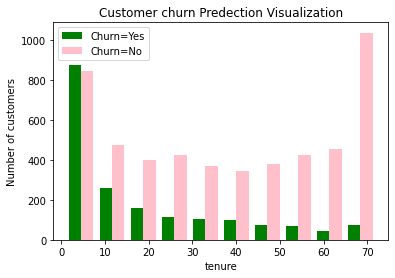

In [21]:
plt.xlabel("tenure")
plt.ylabel("Number of customers")
plt.title("Customer churn Predection Visualization")

plt.hist([tenure_churn_yes,tenure_churn_no],color = ["green","Pink"],label=["Churn=Yes","Churn=No"])
plt.legend()

we will do same data visualization for monthlyCharges 
"I m thinking  customer are leaving may be the reason of monthly charges" You can think different

In [22]:
mc_churn_no = df1[df1.Churn == "No"].MonthlyCharges
mc_churn_yes = df1[df1.Churn == "Yes"].MonthlyCharges

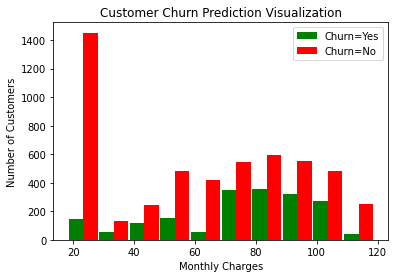

In [23]:
plt.xlabel("Monthly Charges")
plt.ylabel('Number of Customers')

plt.title("Customer Churn Prediction Visualization")
# blood_sugar_men = [113,85,90,150,149,88,93,115,135,80,77,82,129]
# blood_sugar_women = [67,95,89,120,133,150,84,69,89,79,120,112,100]


plt.hist([mc_churn_yes,mc_churn_no],rwidth= 0.95,color=['green',"red"],label=["Churn=Yes","Churn=No"])
plt.legend()

# I want to find a unique value in each columns

In [24]:
for column in df:
    print(f"{column} :        {df[column].unique()}\n")

gender :        ['Female' 'Male']

SeniorCitizen :        [0 1]

Partner :        ['Yes' 'No']

Dependents :        ['No' 'Yes']

tenure :        [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

PhoneService :        ['No' 'Yes']

MultipleLines :        ['No phone service' 'No' 'Yes']

InternetService :        ['DSL' 'Fiber optic' 'No']

OnlineSecurity :        ['No' 'Yes' 'No internet service']

OnlineBackup :        ['Yes' 'No' 'No internet service']

DeviceProtection :        ['No' 'Yes' 'No internet service']

TechSupport :        ['No' 'Yes' 'No internet service']

StreamingTV :        ['No' 'Yes' 'No internet service']

StreamingMovies :        ['No' 'Yes' 'No internet service']

Contract :        ['Month-to-month' 'One year' 'Two year']

PaperlessBilling :        ['Yes' 'No']

PaymentMethod :        ['Elec

i want to see which columns have dtype object

In [25]:
def unique_col_value(df):
    for column in df:
        if df[column].dtypes == "object":
            print(f"{column}:{df[column].unique()}")

In [26]:
unique_col_value(df1)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


one thing you might notice that there is values "No internet service"
we will replace this value with no if you  don't have internet  it mean no as simple is that

In [27]:
df1.replace("No internet service","No",inplace=True)
df1.replace("No phone service","No",inplace=True) # same with phone service

c:\users\karti\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:5233: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [28]:
unique_col_value(df1)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes']
OnlineBackup:['Yes' 'No']
DeviceProtection:['No' 'Yes']
TechSupport:['No' 'Yes']
StreamingTV:['No' 'Yes']
StreamingMovies:['No' 'Yes']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


# We know that machine model understand 0 and 1 we have to replace these  yes and no with 0 and 1



In [29]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({"Yes":1,"No":0},inplace = True)

c:\users\karti\appdata\local\programs\python\python39\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [30]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

In [31]:
for col in df1:
    print(f"{col}:{df1[col].unique()}\n")

gender:[1 0]

SeniorCitizen:[0 1]

Partner:[1 0]

Dependents:[0 1]

tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]

PhoneService:[0 1]

MultipleLines:[0 1]

InternetService:['DSL' 'Fiber optic' 'No']

OnlineSecurity:[0 1]

OnlineBackup:[1 0]

DeviceProtection:[0 1]

TechSupport:[0 1]

StreamingTV:[0 1]

StreamingMovies:[0 1]

Contract:['Month-to-month' 'One year' 'Two year']

PaperlessBilling:[1 0]

PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]

TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]

Churn:[0 1]



# As we can see that there is multiple values in column internet service  so we will be using one hot encoding

In [32]:
df2 = pd.get_dummies(data=df1,columns = ["InternetService","Contract","PaymentMethod"])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [33]:
df2.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2834,0,0,1,1,42,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
2082,0,0,0,1,21,1,1,0,0,0,...,0,0,1,1,0,0,0,0,0,1
2168,0,1,1,0,7,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1
4322,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


see all the data types are number

In [34]:
df2.dtypes 

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

# Next thing we will do is that scaling 
# scaling is very important in deep learning

In [35]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


one thing to be noticed that tenure , MonthlyCharges , Totalcharges 
are not in range 0 and 1

In [36]:
cols_to_scale = ["tenure","MonthlyCharges","TotalCharges"]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])


In [37]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6801,1,0,1,1,0.253521,1,1,0,0,0,...,0,1,0,0,1,0,1,0,0,0
2107,0,0,1,0,0.450704,1,1,0,1,1,...,0,1,0,1,0,0,0,0,1,0
6397,0,1,0,0,0.746479,1,0,0,0,1,...,1,0,0,0,1,0,1,0,0,0
688,0,0,0,0,0.718310,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,1
2407,1,0,1,0,0.014085,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [38]:
for col in df2:
    print(f"{col}  : {df2[col].unique()}") # ["tenure","MonthlyCharges","TotalCharges"] is range between 0 to 1

gender  : [1 0]
SeniorCitizen  : [0 1]
Partner  : [1 0]
Dependents  : [0 1]
tenure  : [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService  : [0 1]
MultipleLines  : [0 1]
OnlineSecurity  : [0 1]
OnlineBackup  : [1 0]
DeviceProtection  : 

# Now this Dataframe is ready to use in machine learning

# before we go for training we need to split out Data set into train and test


In [39]:
x = df2.drop("Churn",axis="columns")
y = df2["Churn"]

In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [41]:
x_train.shape 

(5625, 26)

In [42]:
x_test.shape

(1407, 26)

# Now we are going to import tensor flow libraries

In [43]:
import tensorflow as tf
from tensorflow import keras

In [44]:
model = keras.Sequential([
    keras.layers.Dense(26,input_shape = (26,),activation="relu"),
    keras.layers.Dense(1,activation="sigmoid")
])

In [45]:
model.compile(optimizer="adam",
            loss ="binary_crossentropy",
            metrics=["accuracy"])

# now model training

In [46]:
model.fit(x_train,y_train,epochs = 66)

Epoch 1/66
176/176 [==============================] - 1s 2ms/step - loss: 0.5498 - accuracy: 0.7077
Epoch 2/66
176/176 [==============================] - 0s 2ms/step - loss: 0.4353 - accuracy: 0.7906
Epoch 3/66
176/176 [==============================] - 0s 2ms/step - loss: 0.4214 - accuracy: 0.7986
Epoch 4/66
176/176 [==============================] - 0s 2ms/step - loss: 0.4172 - accuracy: 0.8020
Epoch 5/66
176/176 [==============================] - 0s 2ms/step - loss: 0.4142 - accuracy: 0.8073
Epoch 6/66
176/176 [==============================] - 0s 2ms/step - loss: 0.4127 - accuracy: 0.8066
Epoch 7/66
176/176 [==============================] - 0s 2ms/step - loss: 0.4117 - accuracy: 0.8057
Epoch 8/66
176/176 [==============================] - 0s 2ms/step - loss: 0.4105 - accuracy: 0.8101
Epoch 9/66
176/176 [==============================] - 0s 2ms/step - loss: 0.4092 - accuracy: 0.8073
Epoch 10/66
176/176 [==============================] - 0s 2ms/step - loss: 0.4074 - accuracy: 0.8123

In [47]:
model.evaluate(x_test,y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.4467 - accuracy: 0.7825


[0.44670695066452026, 0.7825160026550293]

# prediction 

In [48]:
mp = model.predict(x_test)
mp[:5]

array([[0.0090076 ],
       [0.09120312],
       [0.58273774],
       [0.02563974],
       [0.29940403]], dtype=float32)

Now problem arise that  it giving me prediction between 0 and 1 


I want exactly 0 and 1 

In [49]:
y_predict = []
for element in mp:
    if element<0.5:
        y_predict.append(0)
        
    else:
        y_predict.append(1)

In [50]:
y_predict[:10] 

[0, 0, 1, 0, 0, 0, 0, 1, 0, 0]

Now we are getting exact value 0 or 1

# classification report is a preformace evaluaton  metric in machine learning
# it show presion ,recall,F1Score

In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1033
           1       0.61      0.52      0.56       374

    accuracy                           0.78      1407
   macro avg       0.72      0.70      0.71      1407
weighted avg       0.77      0.78      0.78      1407



# Now we plot confussion metrics

Text(33.0, 0.5, 'Truth')

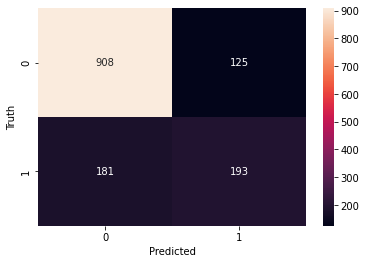

In [52]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predict)

sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')